# Taller de Segmentación RFM

En este notebook aprenderemos a realizar una segmentación RFM completa paso a paso. Se utilizarán datos de transacciones y se explicará cada parte del proceso. ¡Sigue las instrucciones y ejecuta cada celda para ir avanzando!

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
!unzip "Case 1_Online Retail.xlsx - Online Retail.csv.zip"

--2025-04-09 23:06:20--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip [following]
--2025-04-09 23:06:20--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

## 1. Preparación de Datos

Primero, cargaremos la librería necesaria y prepararemos los datos. Para este ejemplo, vamos a simular un DataFrame similar a una tabla de transacciones.

Ejecuta la siguiente celda y revisa el DataFrame resultante.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de seaborn
sns.set(style='whitegrid')

In [ ]:
df = pd.read_csv('Case 1_Online Retail.xlsx - Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


Convierta la variable InvoiceDate en tipo datetime con pd.to_datetime()

## 2. Limpieza y Enriquecimiento de los Datos

En esta sección, eliminamos filas con `CustomerID` nulo (si existieran) y registros con cantidades negativas o cero. Además, crearemos una nueva columna `TotalPrice` que es el producto de `Quantity` y `UnitPrice`.

Eliminar las filas con CustomerID nulo

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)
print(f"número de filas después de eliminar nulos en CustomerID: {len(df)}")


número de filas después de eliminar nulos en CustomerID: 397924


número de filas después de eliminar filas con Quantity <= 0: 397924


Eliminar registros con Quantity <= 0

In [ ]:
df=df[df['Quantity']>0]
print(f"número de filas después de eliminar filas con Quantity <= 0: {len(df)}")

número de filas después de eliminar filas con Quantity <= 0: 397924


Asegure que Price este en float sino lo esta cambielo usando esto.   df["UnitPrice"] = df["UnitPrice"].apply(lambda x:x.replace(",","."))
df["UnitPrice"] = df["UnitPrice"].astype(float)

¿Que estoy haciendo ?

In [ ]:
df["UnitPrice"] = df["UnitPrice"].apply(lambda x: str(x).replace(",","."))
df["UnitPrice"] = df["UnitPrice"].astype(float)
print(df['UnitPrice'].dtype)

float64


Crear columna TotalPrice

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print(df[['Quantity', 'UnitPrice', 'TotalPrice' ]].head())

   Quantity  UnitPrice  TotalPrice
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34


## 3. Cálculo de las Métricas RFM

Calcularemos las siguientes métricas para cada cliente:

- **Recencia (R):** Días transcurridos desde la última compra hasta la fecha de corte.
- **Frecuencia (F):** Número de facturas únicas realizadas por el cliente.
- **Monetario (M):** Total gastado por el cliente.

Primero, definamos la fecha de snapshot (fecha de corte).

Definir la fecha de snapshot (por ejemplo, un día después del último registro)


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Fecha de Snapshot: {snapshot_date}")

rfm_r = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
rfm_r['Recency'] = (snapshot_date - rfm_r['InvoiceDate']).dt.days
rfm_r = rfm_r[['CustomerID', 'Recency']]
print("\nRecencia (R):\n", rfm_r.head())

rfm_f = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
rfm_f.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
print("\nFrecuencia (F):\n", rfm_f.head())

rfm_m = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
rfm_m.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)
print("\nMonetario (M):\n", rfm_m.head())

rfm_table = rfm_r.merge(rfm_f, on='CustomerID', how= 'inner').merge(rfm_m, on='CustomerID', how= 'inner')
print("\nTabla RFM Combinada:\n", rfm_table.head())

<ipython-input-12-0a179b29079d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


Fecha de Snapshot: 2011-12-10 12:50:00

Recencia (R):
    CustomerID  Recency
0     12346.0      326
1     12347.0        2
2     12348.0       75
3     12349.0       19
4     12350.0      310

Frecuencia (F):
    CustomerID  Frequency
0     12346.0          1
1     12347.0          7
2     12348.0          4
3     12349.0          1
4     12350.0          1

Monetario (M):
    CustomerID  Monetary
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40

Tabla RFM Combinada:
    CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


### 3.1 Agrupación por Cliente y Cálculo de R, F y M

Agruparemos el DataFrame por `CustomerID` y calcularemos:

- **Recency:** Días entre el `snapshot_date` y la última `InvoiceDate` de cada cliente.
- **Frecuencia:** Número único de facturas (`InvoiceNo`).
- **Monetario:** Suma de `TotalPrice`.

Utilice grupby con agg (lambda x: (snapshot_date - x.max()).days, nunique, sum )

In [ ]:
rfm_table = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
)
print(rfm_table.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


AttributeError: 'float' object has no attribute 'replace'

Renombre las Columnas de manera correspondiente

In [ ]:
df.rename(columns={'Frecuencia': 'Recency', 'Cantidad': 'Frecuency', 'Monto': 'Monetary'}, inplace=True)
df.rename(columns={df.columns[1]: 'Recency', df.columns[2]: 'Frecuency', df.columns[3]: 'Monetary'}, inplace=True)
print(df.head())

  InvoiceNo Recency                            Frecuency  Monetary  \
0    536365  85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365   71053                  WHITE METAL LANTERN         6   
2    536365  84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365  84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


## 4. Asignación de Puntajes RFM

Ahora, vamos a asignar puntajes a cada una de las métricas usando cuartiles. Para **Recency** asignaremos de forma inversa (más bajo es mejor) y para **Frecuencia** y **Monetario** de forma directa.


Asignar puntajes usando pd.qcut
https://pandas.pydata.org/docs/reference/api/pandas.qcut.html
Tenga en cuent si encesita duplicates= "drop" en algun momento
Y cuando los labels serian 1,2,3,4 y cuando 4,3,2,1

In [ ]:
import pandas as pd

# Assuming 'rfm_table' is the DataFrame containing your RFM data
rfm_df = rfm_table.copy()  # Create a copy of rfm_table and assign it to rfm_df

r_labels = [4, 3, 2, 1]
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], q=4, labels=r_labels, duplicates='drop')

f_labels = [1, 2, 3, 4]
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], q=4, labels=f_labels[:3], duplicates='drop')


m_labels = [1, 2, 3, 4]
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], q=4, labels=m_labels, duplicates='drop')

rfm_df['R_score'] = pd.to_numeric(rfm_df['R_score'], errors='coerce').fillna(0).astype(int)
rfm_df['F_score'] = pd.to_numeric(rfm_df['F_score'], errors='coerce').fillna(0).astype(int)
rfm_df['M_score'] = pd.to_numeric(rfm_df['M_score'], errors='coerce').fillna(0).astype(int)

rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)
print(rfm_df)

            Recency  Frequency  Monetary  R_score  F_score  M_score RFM_Score
CustomerID                                                                   
12346.0         326          1  77183.60        1        1        4       114
12347.0           2          7   4310.00        4        3        4       434
12348.0          75          4   1797.24        2        2        4       224
12349.0          19          1   1757.55        3        1        4       314
12350.0         310          1    334.40        1        1        2       112
...             ...        ...       ...      ...      ...      ...       ...
18280.0         278          1    180.60        1        1        1       111
18281.0         181          1     80.82        1        1        1       111
18282.0           8          2    178.05        4        1        1       411
18283.0           4         16   2094.88        4        3        4       434
18287.0          43          3   1837.28        3        2      

Cree RFM_Score que sea la concatenacion de texto de los anteriores score

In [ ]:
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)
print(rfm_df)

            Recency  Frequency  Monetary  R_score  F_score  M_score RFM_Score
CustomerID                                                                   
12346.0         326          1  77183.60        1        1        4       114
12347.0           2          7   4310.00        4        3        4       434
12348.0          75          4   1797.24        2        2        4       224
12349.0          19          1   1757.55        3        1        4       314
12350.0         310          1    334.40        1        1        2       112
...             ...        ...       ...      ...      ...      ...       ...
18280.0         278          1    180.60        1        1        1       111
18281.0         181          1     80.82        1        1        1       111
18282.0           8          2    178.05        4        1        1       411
18283.0           4         16   2094.88        4        3        4       434
18287.0          43          3   1837.28        3        2      

## 5. Definición de Segmentos

Con los puntajes asignados, podemos definir segmentos de clientes. Por ejemplo, podemos identificar:

- **Champions:** Clientes con puntajes altos en R, F y M (por ejemplo, `R_score >= 3`, `F_score >= 3`, `M_score >= 3`).
- **Loyal Customers:** Clientes leales que compran frecuentemente y tienen un gasto moderado a alto.
- **Potential Loyalist:** Clientes que muestran potencial, pero que aún no alcanzan los niveles de los Champions.
- **At Risk:** Clientes con puntajes bajos en recencia y frecuencia, lo que indica riesgo de abandono.

Puedes personalizar estos criterios según tu caso de negocio.

Ejecuta la siguiente celda para asignar segmentos.
 tiene que aplicarlo en una columna en su df
rfm['Segment'] = rfm.apply(segment_me, axis=1)


In [ ]:
def segment_me(row):
    # Convertir los puntajes a enteros para comparación
    r = int(row['R_score'])
    f = int(row['F_score'])
    m = int(row['M_score'])

    if r >= 3 and f >= 3 and m >= 3:
        return 'Champions'
    elif f >= 3 and m >= 2:
        return 'Loyal Customers'
    elif r >= 3 and f in [2,3] and m in [2,3]:
        return 'Potential Loyalist'
    elif r in [1,2] and f in [1,2]:
        return 'At Risk'
    else:
        return 'Others'
rfm_df['Segment'] = rfm_df.apply(segment_me, axis=1)
print(rfm_df)



            Recency  Frequency  Monetary  R_score  F_score  M_score RFM_Score  \
CustomerID                                                                      
12346.0         326          1  77183.60        1        1        4       114   
12347.0           2          7   4310.00        4        3        4       434   
12348.0          75          4   1797.24        2        2        4       224   
12349.0          19          1   1757.55        3        1        4       314   
12350.0         310          1    334.40        1        1        2       112   
...             ...        ...       ...      ...      ...      ...       ...   
18280.0         278          1    180.60        1        1        1       111   
18281.0         181          1     80.82        1        1        1       111   
18282.0           8          2    178.05        4        1        1       411   
18283.0           4         16   2094.88        4        3        4       434   
18287.0          43         

## 6. Visualizaciones

A continuación, crearemos algunas gráficas para visualizar la distribución de las métricas RFM y la cantidad de clientes por segmento.

### 6.1 Histogramas de Recency, Frequency y Monetary

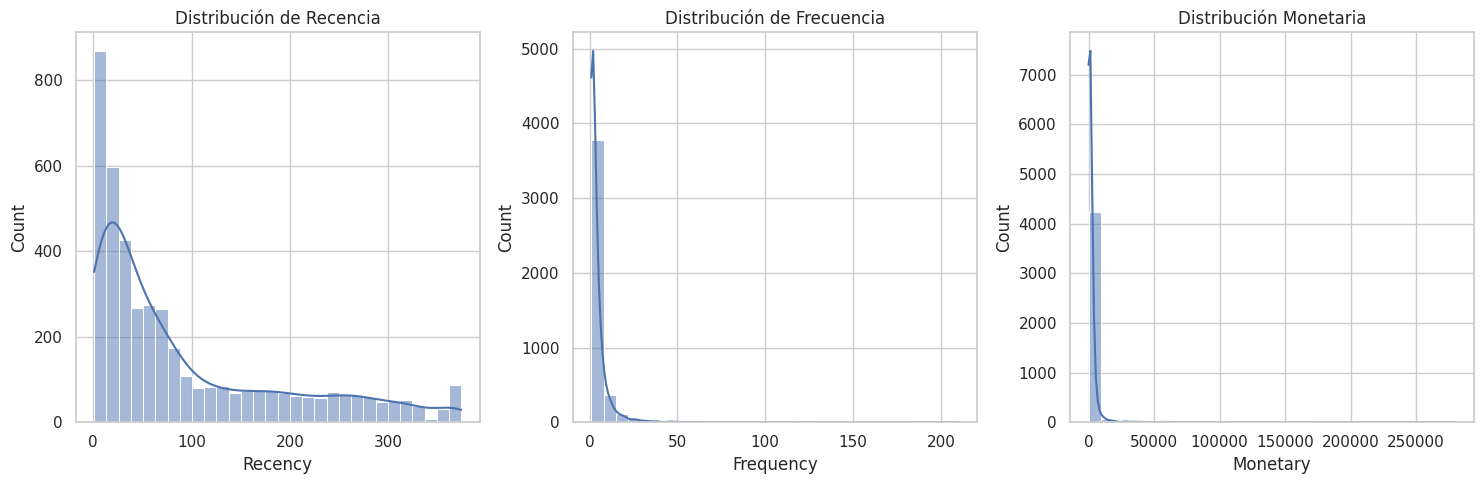

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rfm_df is the correct DataFrame
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=30, kde=True)  # Changed rfm to rfm_df
plt.title('Distribución de Recencia')
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=30, kde=True) # Changed rfm to rfm_df
plt.title('Distribución de Frecuencia')
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=30, kde=True) # Changed rfm to rfm_df
plt.title('Distribución Monetaria')

plt.tight_layout()
plt.show()

### 6.2 Conteo de Clientes por Segmento

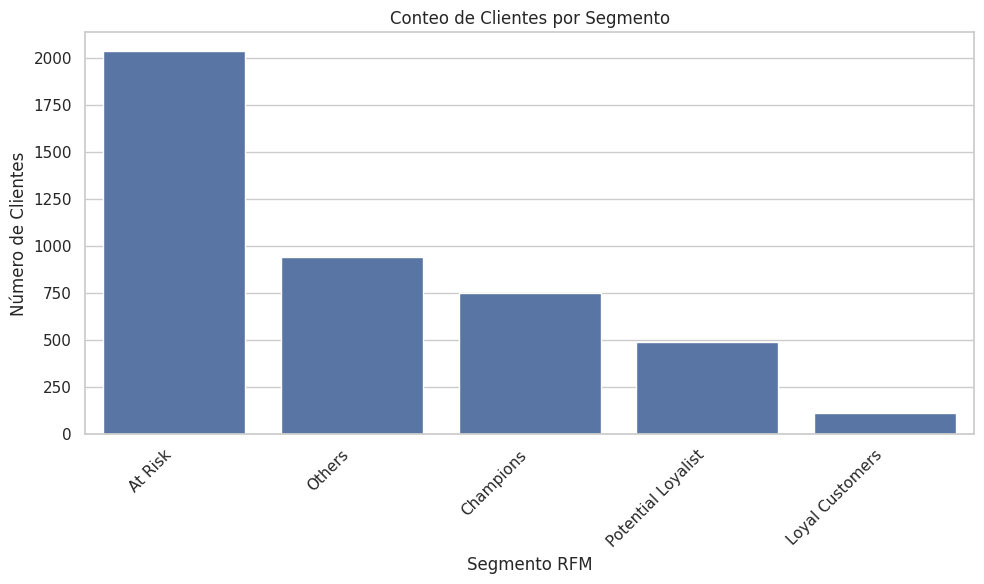

In [ ]:
segment_counts = rfm_df['Segment'].value_counts().sort_values(ascending=False) # Change rfm to rfm_df
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Conteo de Clientes por Segmento')
plt.xlabel('Segmento RFM')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 6.3 Gráfico de Dispersión: Frequency vs Monetary

Visualizaremos la relación entre la frecuencia y el gasto, diferenciando por segmento.

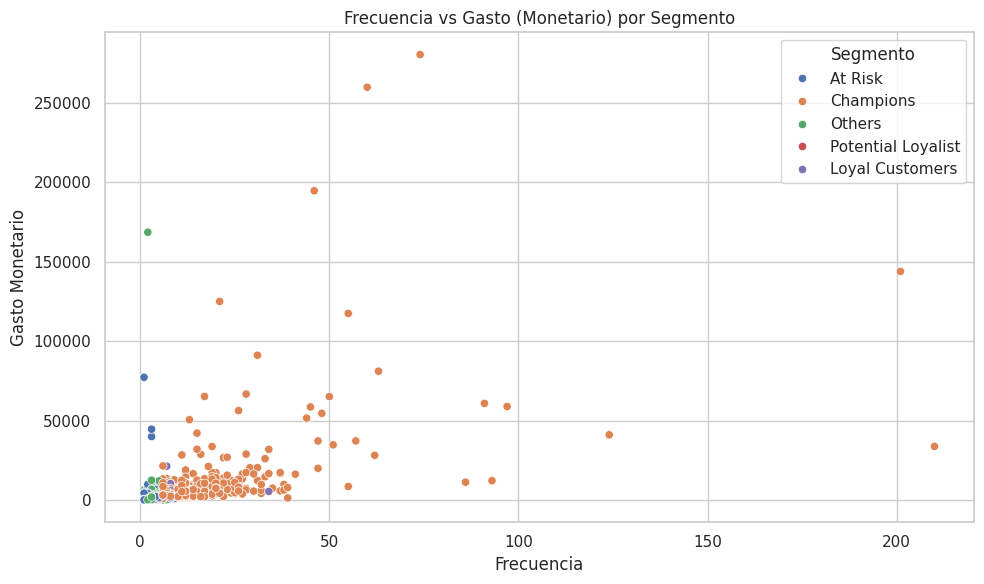

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Segment', data=rfm_df)
plt.title('Frecuencia vs Gasto (Monetario) por Segmento')
plt.xlabel('Frecuencia')
plt.ylabel('Gasto Monetario')
plt.legend(title='Segmento')
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Conclusiones y Próximos Pasos

En este taller hemos:

1. **Preparado y limpiado los datos**: Se simuló un DataFrame, se convirtieron las fechas y se creó la columna `TotalPrice`.
2. **Calculado las métricas RFM** para cada cliente.
3. **Asignado puntajes** a cada métrica utilizando cuartiles.
4. **Definido segmentos** de clientes basados en los puntajes.
5. **Visualizado** la distribución de las métricas y los segmentos.

Utiliza estos resultados para diseñar estrategias de marketing específicas para cada segmento (por ejemplo, campañas de retención para los clientes "At Risk" o programas VIP para los "Champions").

¡Felicidades por completar el taller!